# Convert Units
Pull aboveground biomass data from Chloris and convert to aboveground carbon density by multiplying the data by 0.476.

### Import required packages.

In [1]:
import snowflake.connector
import yaml
import pandas as pd
import matplotlib.pyplot as plt

### Connect to snowflake and pull variables of interest.
Note that the access credentials to the snowflake database are not included below. The code should be modified where shown to include the access credentials provided to you. 

In [2]:
# Pull database information from the config yaml file. 
with open('config.yml', 'r') as file:
    config = yaml.safe_load(file)

# Connect to the snowflake database using info from config file.
conn = snowflake.connector.connect(
    account = config['database-info']['account'], # Replace 'config['database-info']['account']' with the database account name. 
    user = config['database-info']['user'], # Replace 'config['database-info']['user']' with the database username.
    password = config['database-info']['password'], # Replace 'config['database-info']['password']' with the database password.
    warehouse = config['database-info']['warehouse'], # Replace 'config['database-info']['warehouse']' with the database warehouse name.
    database = config['database-info']['database'], # Replace 'config['database-info']['database']' with the database name.
)

# Define the SQL query to get chloris stock data for 2020.
# Name the raw chloris stock 'chloris_agb' (aboveground biomass).
# Convert raw chloris biomass stock to carbon stock and name the column 'chloris_acd' (aboveground carbon density).
sql_query = """
    SELECT
        year,
        lon,
        lat,
        stock AS chloris_agb,
        stock * 0.476 AS chloris_acd
    FROM
        chloris.forest_cover
    WHERE
        year = 2020
    """

# Execute the query and get the rows and columns of data.
cursor = conn.cursor()
cursor.execute(sql_query)
data_rows = cursor.fetchall()
data_columns = [desc[0] for desc in cursor.description]
cursor.close()
conn.close()

### Convert to dataframe and plot.

In [3]:
# Format the data into a pandas dataframe.
data_df = pd.DataFrame(data_rows, columns=data_columns)
data_df.head(5)

,YEAR,LON,LAT,CHLORIS_AGB,CHLORIS_ACD
0,2020,-2.79712500,57.10637500,60.00000000,28.56000000000
1,2020,-2.78087500,57.10637500,116.00000000,55.21600000000
2,2020,-2.80112500,57.10637500,145.00000000,69.02000000000
3,2020,-2.80012500,57.10637500,115.00000000,54.74000000000
4,2020,-2.79787500,57.10637500,35.00000000,16.66000000000


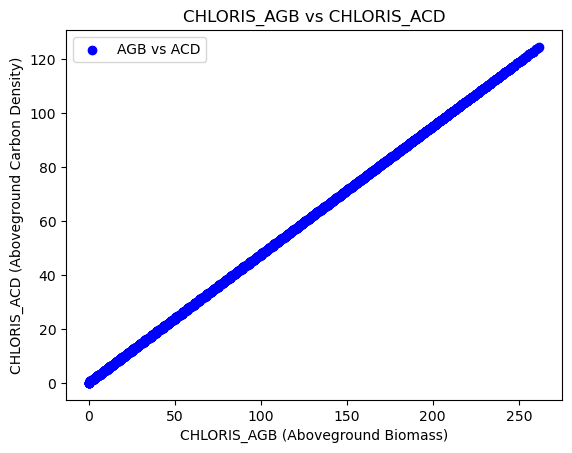

In [4]:
# Create a scatter plot comparing AGB to ACD data.
plt.scatter(data_df['CHLORIS_AGB'], data_df['CHLORIS_ACD'], color='blue', label='AGB vs ACD')

# Add labels and title.
plt.xlabel('CHLORIS_AGB (Aboveground Biomass)')
plt.ylabel('CHLORIS_ACD (Aboveground Carbon Density)')
plt.title('CHLORIS_AGB vs CHLORIS_ACD')

# Display the legend
plt.legend()

# Show the plot
plt.show()